In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
company_data=pd.read_csv('Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
company_data.shape

(400, 11)

In [5]:
company_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder
le_encoder=LabelEncoder()
company_data['ShelveLoc'] = le_encoder.fit_transform(company_data['ShelveLoc'])
company_data['Urban'] = le_encoder.fit_transform(company_data['Urban'])
company_data['US'] = le_encoder.fit_transform(company_data['US'])
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [8]:
company_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int32
Age              int64
Education        int64
Urban            int32
US               int32
dtype: object

In [9]:
X=company_data.drop(['ShelveLoc'],axis=1)
y=company_data[['ShelveLoc']]

In [10]:
X.shape,y.shape

((400, 10), (400, 1))

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12)

In [12]:
X_train.shape,y_train.shape

((320, 10), (320, 1))

In [13]:
X_test.shape,y_test.shape

((80, 10), (80, 1))

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=4)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [37]:
from sklearn.model_selection import GridSearchCV
grid_search_cv=GridSearchCV(estimator=dt_model,param_grid={'criterion':['entropy','gini'],
                                           'max_depth':[1,2,3,4,5,6,7,8,9,10]},
                                            cv=5
                                           )
grid_search_cv.fit(X,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

{'criterion': 'gini', 'max_depth': 4}
0.6225


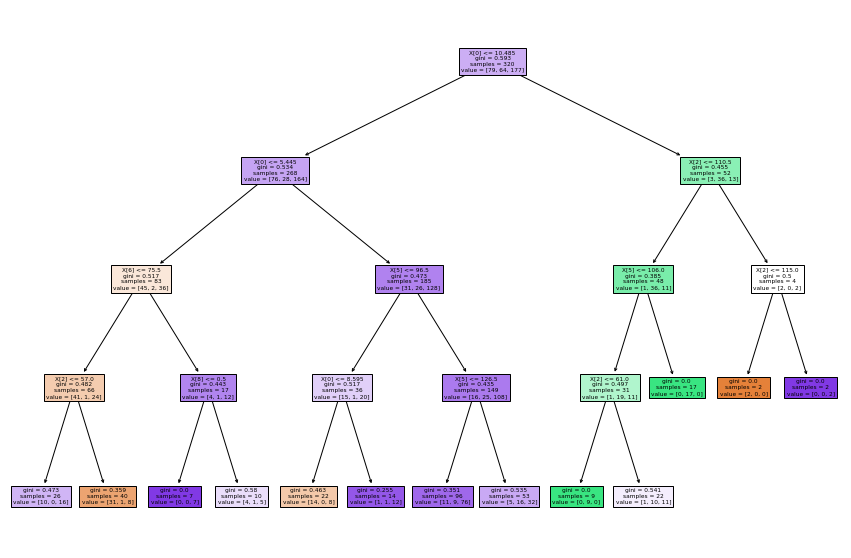

In [38]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(decision_tree=dt_model,filled=True)
plt.show()

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [40]:
y_train_pred = dt_model.predict(X_train)
y_train_pred

array([2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2, 0, 0,
       2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2,
       0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 2, 2, 2, 0, 1,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 0, 2, 2, 2, 1, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2,
       2, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 1, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 0, 2, 1,

In [41]:
accuracy_score(y_train,y_train_pred)

0.73125

In [42]:
confusion_matrix(y_train,y_train_pred)

array([[ 47,   0,  32],
       [  1,  26,  37],
       [ 16,   0, 161]], dtype=int64)

In [43]:
y_test_pred=dt_model.predict(X_test)
y_test_pred

array([0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0, 1, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2])

In [44]:
accuracy_score(y_test,y_test_pred)

0.6375

In [45]:
confusion_matrix(y_test,y_test_pred)

array([[ 7,  0, 10],
       [ 0,  6, 15],
       [ 4,  0, 38]], dtype=int64)